# CarPrice_Regression Model

## installation

In [ ]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install explainerdashboard
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.7 MB/s 
     |████████████████████████████████| 125 kB 23.1 MB/s 
     |████████████████████████████████| 25.9 MB 11.8 MB/s 
     |████████████████████████████████| 6.8 MB 10.0 MB/s 
     |████████████████████████████████| 2.0 MB 44.3 MB/s 
     |████████████████████████████████| 10.4 MB 33.4 MB/s 
     |████████████████████████████████| 88 kB 8.9 MB/s 
     |████████████████████████████████| 1.7 MB 46.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 5.9 MB/s 
     |████████████████████████████████| 1.3 MB 48.5 MB/s 
     |████████████████████████████████| 262 kB 66.7 MB/s 
     |████████████████████████████████| 167 kB 29.5 MB/s 
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 5.1 MB/s 
     |████████████████████████████████| 47 kB 5.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 569 kB 63.4 MB/s 
     |██████████████████████████████

## Data setting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir car_price

In [ ]:
pwd

'/content'

In [ ]:
!unzip /content/drive/MyDrive/car_price_prediction.csv.zip -d /content/car_price/

Archive:  /content/drive/MyDrive/car_price_prediction.csv.zip
  inflating: /content/car_price/car_price_prediction.csv  


In [1]:
import pycaret
print(pycaret.__version__)

2.3.10


In [3]:
import os
import time
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import logging
from warnings import simplefilter

In [4]:
df_data = pd.read_csv('./car_price/car_price_prediction.csv')

## Data preprosessing

In [5]:
df_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df_data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


<AxesSubplot:>

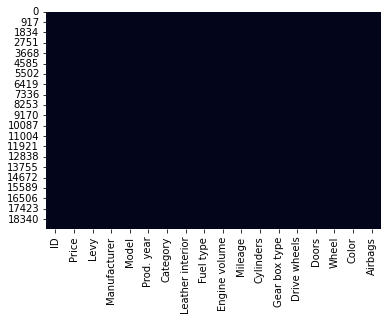

In [7]:
sns.heatmap(df_data.isnull(), cbar=False)

In [8]:
print(df_data.dtypes)

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


In [9]:
df_data = df_data.sample(frac=0.5, replace=True, random_state=1)

In [10]:
df_data.shape

(9618, 18)

In [11]:
df_data['Drive wheels'].unique()

array(['Front', 'Rear', '4x4'], dtype=object)

In [12]:
df_data['Levy']

235       289
12172     638
5192      730
17289    1053
10955    3894
         ... 
15664    1053
17412       -
9555        -
16163     749
10494     697
Name: Levy, Length: 9618, dtype: object

In [13]:
df_data["Mileage"] = df_data["Mileage"].str.replace(pat='km', repl='', regex=True)
df_data['Mileage'] = df_data['Mileage'].astype('int')
df_data.drop(columns='ID',inplace=True)

In [14]:
print(df_data.dtypes)

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


## Model set up

In [15]:
from pycaret.regression import *

reg = setup(data=df_data, target='Price', train_size=0.8, session_id=10, normalize=True)

,Description,Value
0,session_id,10
1,Target,Price
2,Original Data,"(9618, 17)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7694, 1411)"


## Mark down

In [16]:
eda()

Output hidden; open in https://colab.research.google.com to view.

## Model compare

In [17]:
best5models = compare_models(sort='RMSE', n_select=5, fold=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.313387e+03,9.769937e+07,9.839618e+03,7.326000e-01,1.0508,1.066370e+01,15.3267
et,Extra Trees Regressor,3.918862e+03,1.065823e+08,1.031378e+04,7.027000e-01,0.9282,7.056100e+00,21.5167
lightgbm,Light Gradient Boosting Machine,5.817766e+03,1.117265e+08,1.054769e+04,6.909000e-01,1.2841,1.572840e+01,0.4633
dt,Decision Tree Regressor,4.743959e+03,1.495622e+08,1.221388e+04,5.844000e-01,1.1792,6.511900e+00,0.3567
gbr,Gradient Boosting Regressor,7.628278e+03,1.550367e+08,1.242995e+04,5.704000e-01,1.4771,1.802970e+01,6.6767
knn,K Neighbors Regressor,6.320391e+03,1.555483e+08,1.243670e+04,5.714000e-01,1.2487,1.426820e+01,16.2133
ridge,Ridge Regression,7.868240e+03,1.701453e+08,1.301303e+04,5.292000e-01,1.4787,1.707170e+01,0.2800
br,Bayesian Ridge,7.847239e+03,1.739766e+08,1.316289e+04,5.176000e-01,1.4654,1.643330e+01,9.4533
llar,Lasso Least Angle Regression,7.982450e+03,1.949266e+08,1.394129e+04,4.563000e-01,1.4855,1.609680e+01,0.6667
lasso,Lasso Regression,7.858924e+03,1.954776e+08,1.396021e+04,4.534000e-01,1.4532,1.530690e+01,2.9800


In [23]:
ensemble_best = ensemble_model(best5models[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4167.1236,7.839605e+07,8854.1546,0.7878,0.9916,17.4737
1,4307.4487,9.814758e+07,9906.9462,0.7458,1.1501,24.1654
2,4445.3119,1.145986e+08,10705.0742,0.7163,1.0716,10.2627
3,5406.0954,1.869642e+08,13673.4866,0.6579,1.1190,8.5664
4,4132.1990,5.599766e+07,7483.1587,0.7937,1.0406,4.1279
5,4323.1382,8.890349e+07,9428.8648,0.7799,1.1995,13.7210
6,4679.0020,1.379043e+08,11743.2672,0.6568,0.9925,3.9725
7,3932.2430,4.295509e+07,6554.0133,0.8212,1.1305,17.6969
8,4421.4147,8.088057e+07,8993.3625,0.7209,1.1433,10.3599


In [18]:
blend_best = blend_models(estimator_list=[best5models[0], best5models[1], best5models[2]])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3994.5757,7.105565e+07,8429.4512,0.8077,1.0024,17.0606
1,3915.8211,8.048656e+07,8971.4301,0.7915,1.1510,19.5604
2,4274.5422,1.102072e+08,10497.9612,0.7272,1.0684,8.8361
3,4973.5920,1.631437e+08,12772.7720,0.7015,1.1087,10.0197
4,3811.9326,4.882028e+07,6987.1511,0.8201,1.0444,3.8227
5,3947.5921,6.387878e+07,7992.4204,0.8419,1.1884,12.5842
6,4218.9362,1.256586e+08,11209.7526,0.6873,0.9776,3.5314
7,3693.7879,4.260486e+07,6527.2401,0.8226,1.1257,15.0716
8,4180.4864,7.611713e+07,8724.5129,0.7373,1.1374,10.0195


In [19]:
import matplotlib.pyplot as plt

plot_model(blend_best)

In [20]:
plot_model(blend_best, plot = 'error')

In [21]:
evaluate_model(blend_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predict

In [22]:
predict_model(blend_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3665.5684,5.795781e+07,7613.0027,0.8219,1.0512,4.9381


,Prod. year,Mileage,Cylinders,Levy_-,Levy_1011,Levy_1016,Levy_1017,Levy_1018,Levy_1024,Levy_1028,...,Airbags_2,Airbags_3,Airbags_4,Airbags_5,Airbags_6,Airbags_7,Airbags_8,Airbags_9,Price,Label
0,0.027224,-0.025142,-0.502874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19121,16116.749601
1,0.027224,-0.024775,1.188911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48610,44736.320846
2,0.721945,-0.026969,2.880696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83891,68591.671387
3,-1.014858,-0.021810,-0.502874,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17876,18961.736055
4,0.721945,-0.028187,1.188911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14740,21003.714225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,0.548265,-0.025548,-0.502874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14586,15681.870069
1920,0.374584,-0.024465,-0.502874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22894,3831.167090
1921,-0.146457,-0.020572,1.188911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125,1314.499715
1922,0.548265,-0.025372,-0.502874,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16308,13351.135001
